## Import Modules

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,auc
from sklearn.utils import shuffle

import nltk
import nltk as nlp
import string
import re
import pickle

from nltk.tokenize import word_tokenize
import re
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from tqdm import tqdm, tqdm_notebook
tqdm.pandas(tqdm_notebook)

wordnet = WordNetLemmatizer()
regex = re.compile('[%s]' % re.escape(string.punctuation))

## Load in and prepare datasets

In [21]:
true = pd.read_csv(r"data/True.csv")
fake = pd.read_csv(r"data/Fake.csv")

true["target"] = 0
fake["target"] = 1

df = pd.concat([true,fake])

df = shuffle(df)
df.head()

,title,text,subject,date,target
14319,Argentina's first female submarine officer on ...,BUENOS AIRES (Reuters) - One of the 44 crew me...,worldnews,"November 20, 2017",0
6684,Climate scientists adjust as Trump builds team...,SAN FRANCISCO (Reuters) - Climate scientists w...,politicsNews,"December 15, 2016",0
3010,The Internet Just Tore Trump APART After He D...,"Civil rights icon, Rep. John Lewis, recently a...",News,"January 14, 2017",1
19405,North Korea official says North may consider h...,SEOUL (Reuters) - North Korean Foreign Ministe...,worldnews,"September 22, 2017",0
21330,Suicide attack on Kabul Shi'ite mosque kills a...,KABUL (Reuters) - A suicide bomber blew himsel...,worldnews,"August 25, 2017",0


## Functions

In [34]:
def basic_text_cleaning(line_from_column):
    # This function takes in a string, not a list or an array for the arg line_from_column
    
    tokenized_doc = word_tokenize(line_from_column)
    
    new_review = []
    for token in tokenized_doc:
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_review.append(new_token)
    
    new_term_vector = []
    for word in new_review:
        if not word in stopwords.words('english'):
            new_term_vector.append(word)
    
    final_doc = []
    for word in new_term_vector:
        final_doc.append(wordnet.lemmatize(word))
    
    return ' '.join(final_doc)

def generate_roc_curve(model,y_test, probs, title):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic - {}'.format(title))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def plot_con_matrix(classifier,X_test,y_test):
    class_names = df["target"].value_counts()
    np.set_printoptions(precision=2)
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", None)]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)

def load_up_classifier(classifier):
    x_train,x_test,y_train,y_test = train_test_split(df['text'], df["target"], test_size=0.25, random_state=2020)
    
    pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', classifier)])
    
    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)
    probs = model.predict_proba(x_test)
    
    plot_con_matrix(classifier=model,X_test=x_test,y_test=y_test)
    
    return model, probs, y_test

## Training classifiers without changing hyperparameters (Before text cleaning)

#### Logistic Regression

Confusion matrix, without normalization
[[5245   61]
 [  86 5833]]
Normalized confusion matrix
[[5245   61]
 [  86 5833]]


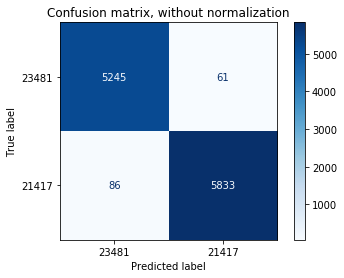

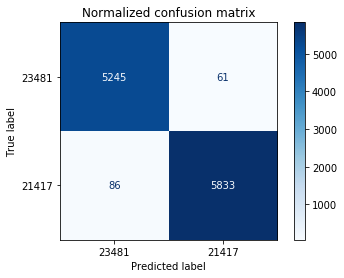

In [35]:
model_LR, probs, y_test = load_up_classifier(classifier=LogisticRegression())

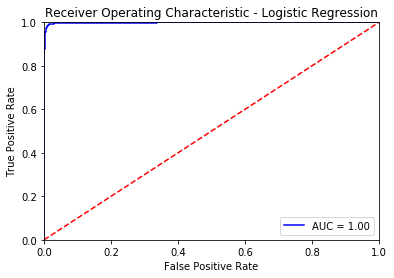

In [36]:
generate_roc_curve(model=model_LR,y_test=y_test, probs=probs, title="Logistic Regression")

#### Multinomial Naive Bayes

Confusion matrix, without normalization
[[4926  380]
 [ 304 5615]]
Normalized confusion matrix
[[4926  380]
 [ 304 5615]]


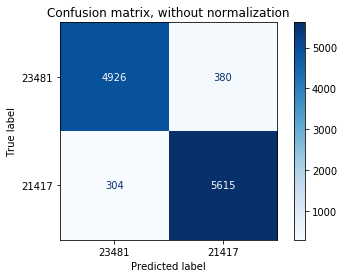

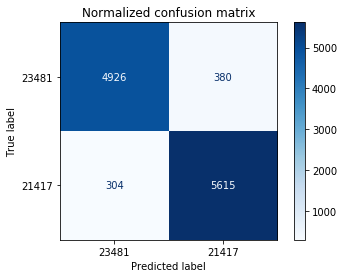

In [37]:
model_MNB, probs, y_test = load_up_classifier(classifier=MultinomialNB())

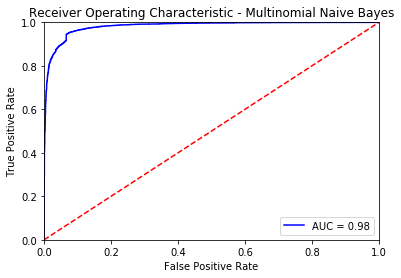

In [38]:
generate_roc_curve(model=model_MNB,y_test=y_test, probs=probs, title = "Multinomial Naive Bayes")

#### Bernoulli Naive Bayes 

Confusion matrix, without normalization
[[5120  186]
 [ 461 5458]]
Normalized confusion matrix
[[5120  186]
 [ 461 5458]]


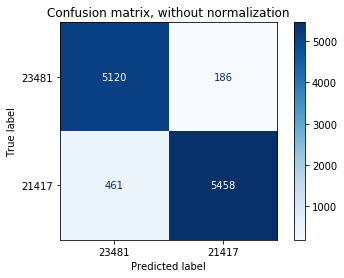

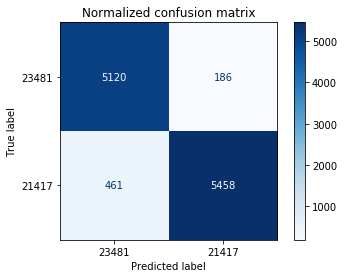

In [39]:
model_BNB, probs, y_test = load_up_classifier(classifier=BernoulliNB())

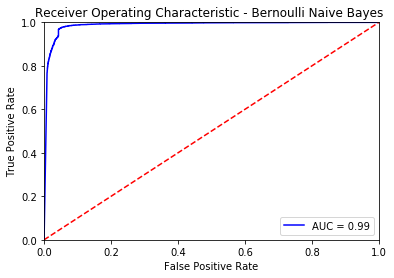

In [40]:
generate_roc_curve(model=model_BNB,y_test=y_test, probs=probs, title="Bernoulli Naive Bayes ")

#### Gradient Boost Classifier

Confusion matrix, without normalization
[[5293   13]
 [  33 5886]]
Normalized confusion matrix
[[5293   13]
 [  33 5886]]


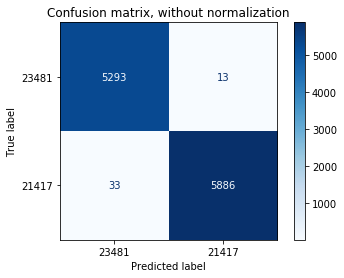

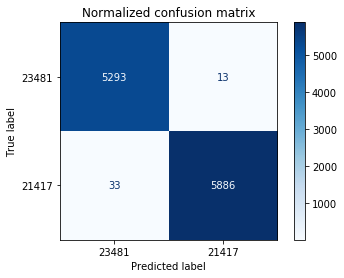

In [41]:
model_GBC, probs, y_test = load_up_classifier(classifier=GradientBoostingClassifier())

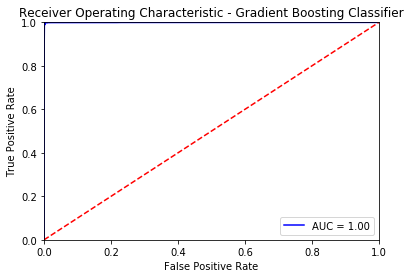

In [42]:
generate_roc_curve(model=model_GBC,y_test=y_test, probs=probs, title="Gradient Boosting Classifier")

#### Decision Tree

Confusion matrix, without normalization
[[5284   22]
 [  22 5897]]
Normalized confusion matrix
[[5284   22]
 [  22 5897]]


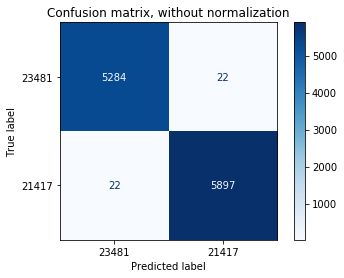

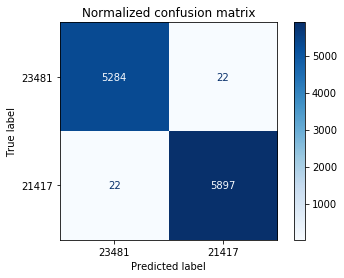

In [43]:
model_DT, probs, y_test = load_up_classifier(classifier=DecisionTreeClassifier())

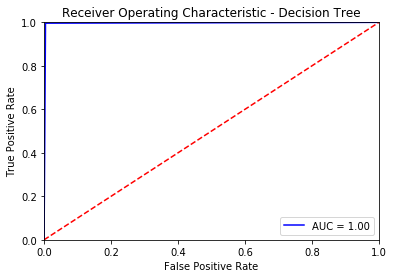

In [44]:
generate_roc_curve(model=model_DT,y_test=y_test, probs=probs, title="Decision Tree")

#### RFC Classifier

Confusion matrix, without normalization
[[5246   60]
 [  70 5849]]
Normalized confusion matrix
[[5246   60]
 [  70 5849]]


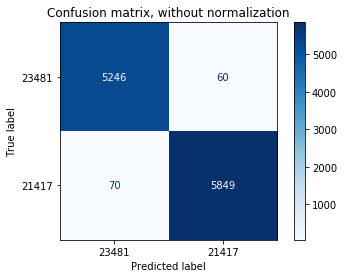

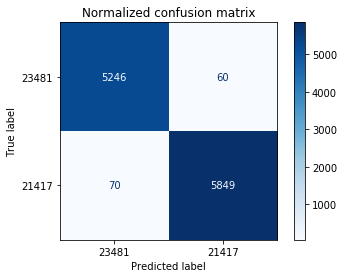

In [45]:
model_RFC, probs, y_test = load_up_classifier(classifier=RandomForestClassifier())

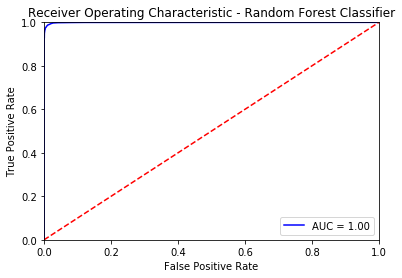

In [46]:
generate_roc_curve(model=model_RFC,y_test=y_test, probs=probs, title="Random Forest Classifier")

The evaluation results without tweaking hyperparameter are not too bad, we will save these models first as a backup

In [56]:
model_file_list = [r"models/LR_model.pkl",
                   r"models/MNVBC_model.pkl",
                   r"models/BNBC_model.pkl",
                   r"models/GBC_model.pkl",
                   r"models/DT_model.pkl",
                   r"models/RFC_model.pkl"]

model_list = [model_LR,model_MNB,model_BNB,model_GBC,model_DT,model_RFC]

for model, filename in zip(model_list, model_file_list):
    pickle.dump(model, open(filename, 'wb'))

## Cleaning text data

In [60]:
df["clean_text"] = df["text"].progress_map(basic_text_cleaning)
df.head()

100%|██████████| 44898/44898 [1:49:44<00:00,  6.82it/s]  


,title,text,subject,date,target,clean_text
14319,Argentina's first female submarine officer on ...,BUENOS AIRES (Reuters) - One of the 44 crew me...,worldnews,"November 20, 2017",0,BUENOS AIRES Reuters One 44 crew member board ...
6684,Climate scientists adjust as Trump builds team...,SAN FRANCISCO (Reuters) - Climate scientists w...,politicsNews,"December 15, 2016",0,SAN FRANCISCO Reuters Climate scientist worrie...
3010,The Internet Just Tore Trump APART After He D...,"Civil rights icon, Rep. John Lewis, recently a...",News,"January 14, 2017",1,Civil right icon Rep John Lewis recently annou...
19405,North Korea official says North may consider h...,SEOUL (Reuters) - North Korean Foreign Ministe...,worldnews,"September 22, 2017",0,SEOUL Reuters North Korean Foreign Minister Ri...
21330,Suicide attack on Kabul Shi'ite mosque kills a...,KABUL (Reuters) - A suicide bomber blew himsel...,worldnews,"August 25, 2017",0,KABUL Reuters A suicide bomber blew entrance S...


## Training classifiers without changing hyperparameters

In [61]:
def load_up_classifier_clean(classifier):
    x_train,x_test,y_train,y_test = train_test_split(df['clean_text'], df["target"], test_size=0.25, random_state=2020)
    
    pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', classifier)])
    
    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)
    probs = model.predict_proba(x_test)
    
    plot_con_matrix(classifier=model,X_test=x_test,y_test=y_test)
    
    return model, probs, y_test

#### Logistic Regression

Confusion matrix, without normalization
[[5247   59]
 [  89 5830]]
Normalized confusion matrix
[[5247   59]
 [  89 5830]]


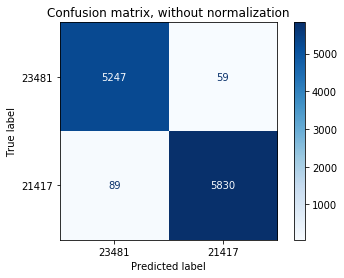

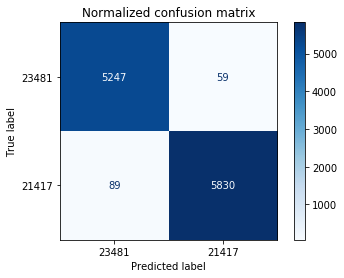

In [63]:
model_LR, probs, y_test = load_up_classifier_clean(classifier=LogisticRegression())

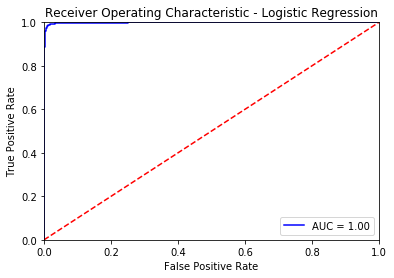

In [64]:
generate_roc_curve(model=model_LR,y_test=y_test, probs=probs, title="Logistic Regression")

#### Multinomial Naive Bayes

Confusion matrix, without normalization
[[5006  300]
 [ 343 5576]]
Normalized confusion matrix
[[5006  300]
 [ 343 5576]]


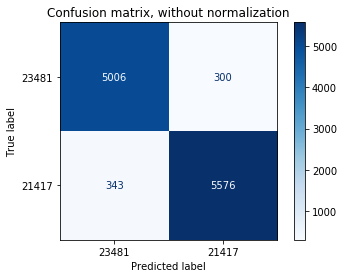

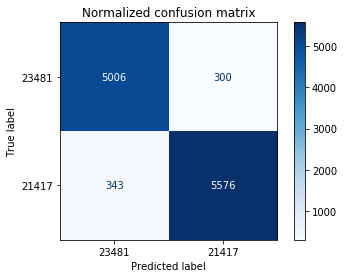

In [66]:
model_MNB, probs, y_test = load_up_classifier_clean(classifier=MultinomialNB())

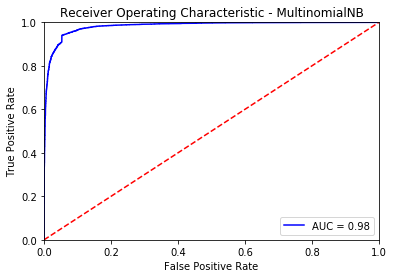

In [67]:
generate_roc_curve(model=model_MNB,y_test=y_test, probs=probs, title="MultinomialNB")

#### Bernoulli Naive Bayes 

Confusion matrix, without normalization
[[5180  126]
 [ 212 5707]]
Normalized confusion matrix
[[5180  126]
 [ 212 5707]]


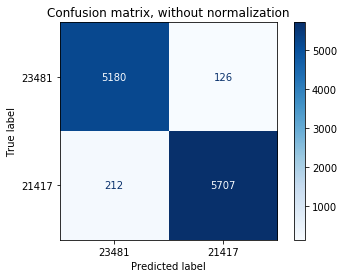

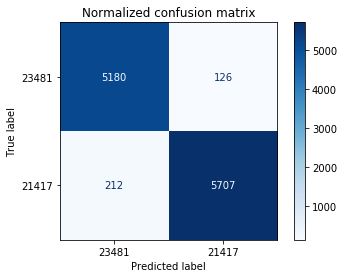

In [68]:
model_BNB, probs, y_test = load_up_classifier_clean(classifier=BernoulliNB())

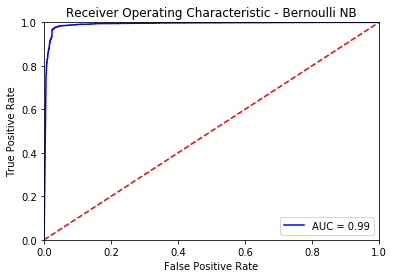

In [69]:
generate_roc_curve(model=model_BNB,y_test=y_test, probs=probs, title="Bernoulli NB")

#### Gradient Boost Classifier

Confusion matrix, without normalization
[[5295   11]
 [  43 5876]]
Normalized confusion matrix
[[5295   11]
 [  43 5876]]


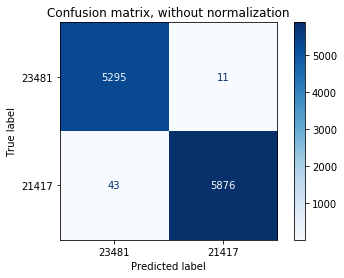

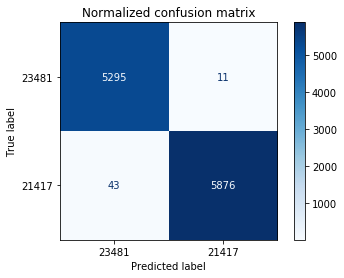

In [70]:
model_GBC, probs, y_test = load_up_classifier_clean(classifier=GradientBoostingClassifier())

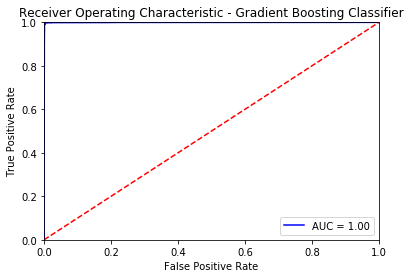

In [71]:
generate_roc_curve(model=model_GBC,y_test=y_test, probs=probs, title="Gradient Boosting Classifier")

#### Decision Tree

Confusion matrix, without normalization
[[5289   17]
 [  12 5907]]
Normalized confusion matrix
[[5289   17]
 [  12 5907]]


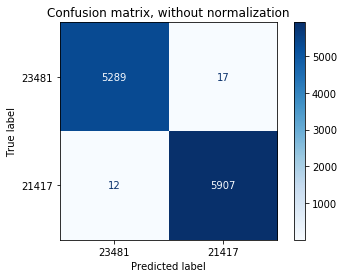

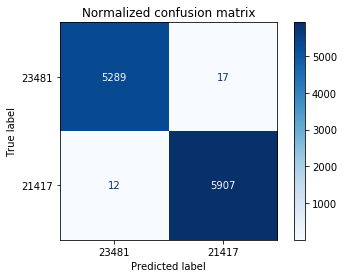

In [72]:
model_DT, probs, y_test = load_up_classifier_clean(classifier=DecisionTreeClassifier())

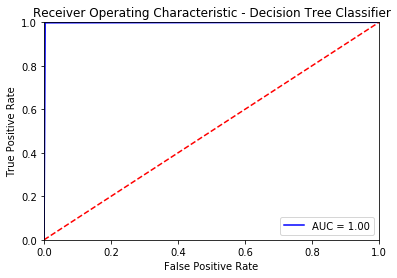

In [73]:
generate_roc_curve(model=model_DT,y_test=y_test, probs=probs, title="Decision Tree Classifier")

#### RFC

Confusion matrix, without normalization
[[5250   56]
 [  80 5839]]
Normalized confusion matrix
[[5250   56]
 [  80 5839]]


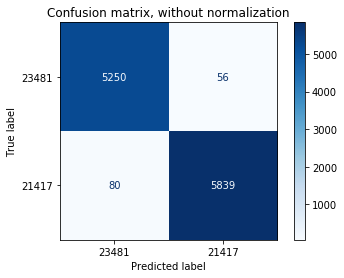

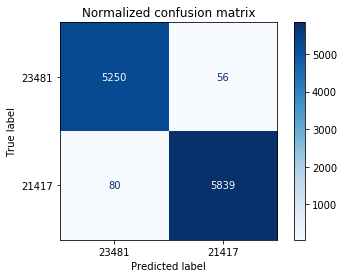

In [74]:
model_RFC, probs, y_test = load_up_classifier_clean(classifier=RandomForestClassifier())

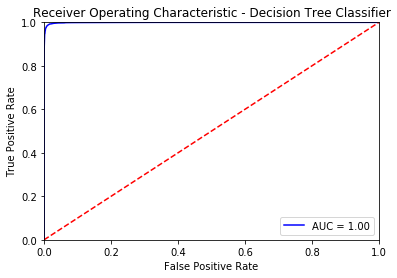

In [75]:
generate_roc_curve(model=model_RFC,y_test=y_test, probs=probs, title="Decision Tree Classifier")